In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [140]:
data_df = pd.read_csv('Every5Sec30Sec.csv')
data_df.head()


,Time Elapsed (s),Voltage
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Text(0, 0.5, 'v (m/s)')

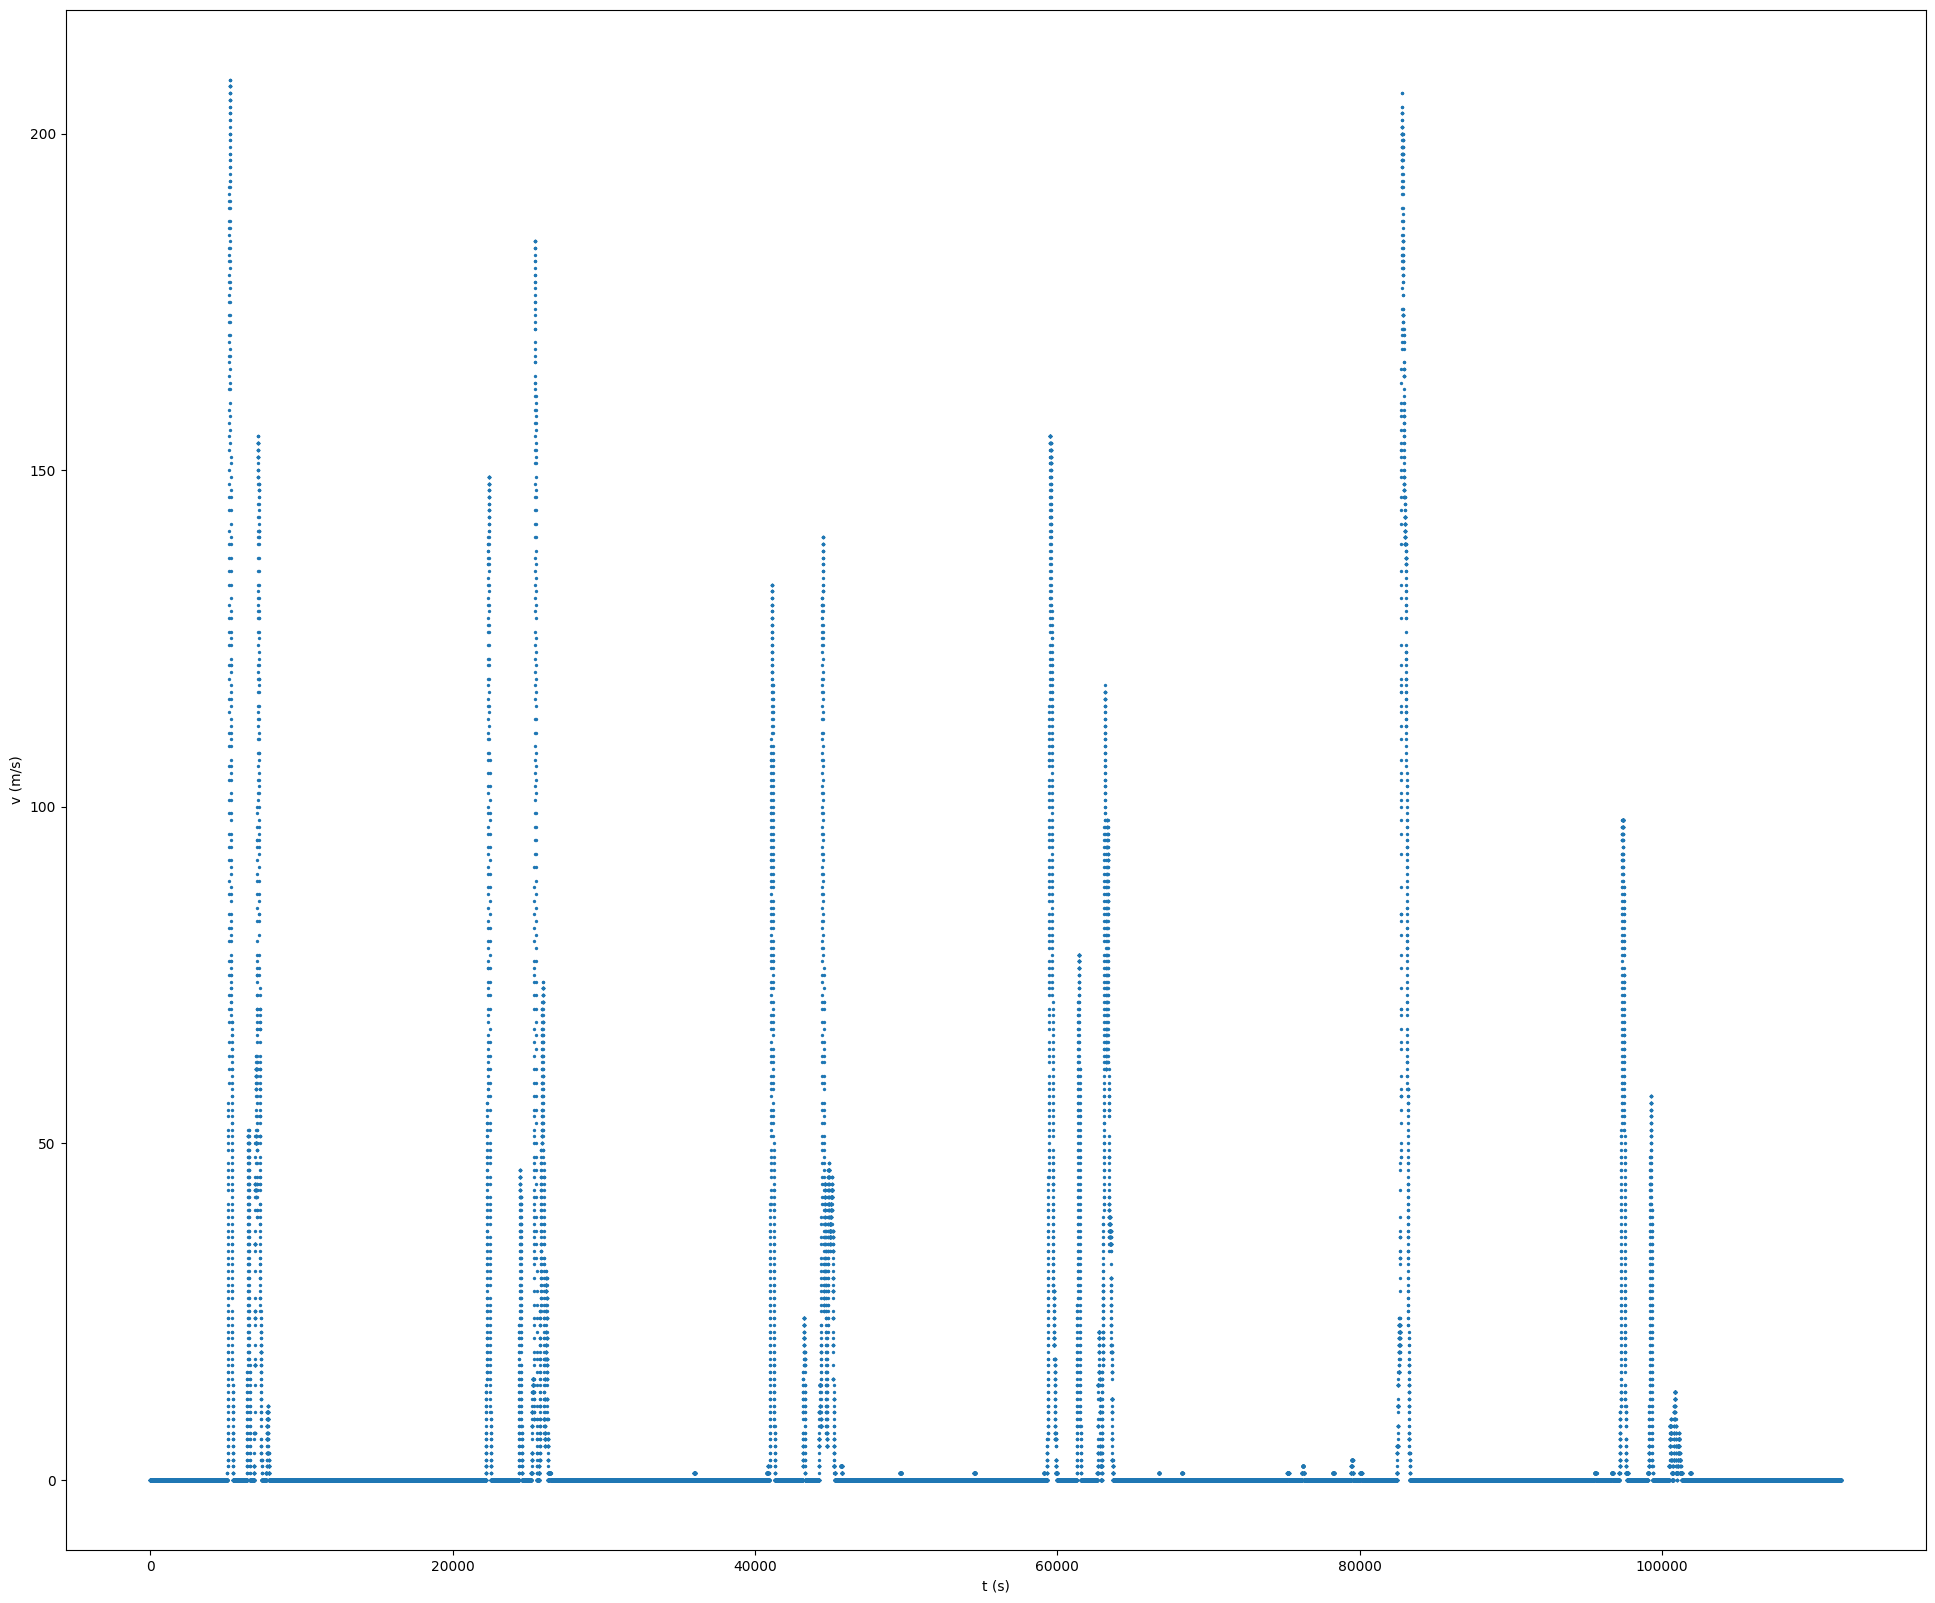

In [141]:
x=data_df["Time Elapsed (s)"]
y=data_df["Voltage"]
plt.figure(figsize=(24, 20))
#plt.ylim(-10,4000 )
#plt.xlim(16000, 23000)
plt.scatter(x,y, s=2)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
#plt.plot(x,y, color='red', linewidth=0.2)
#plt.show()

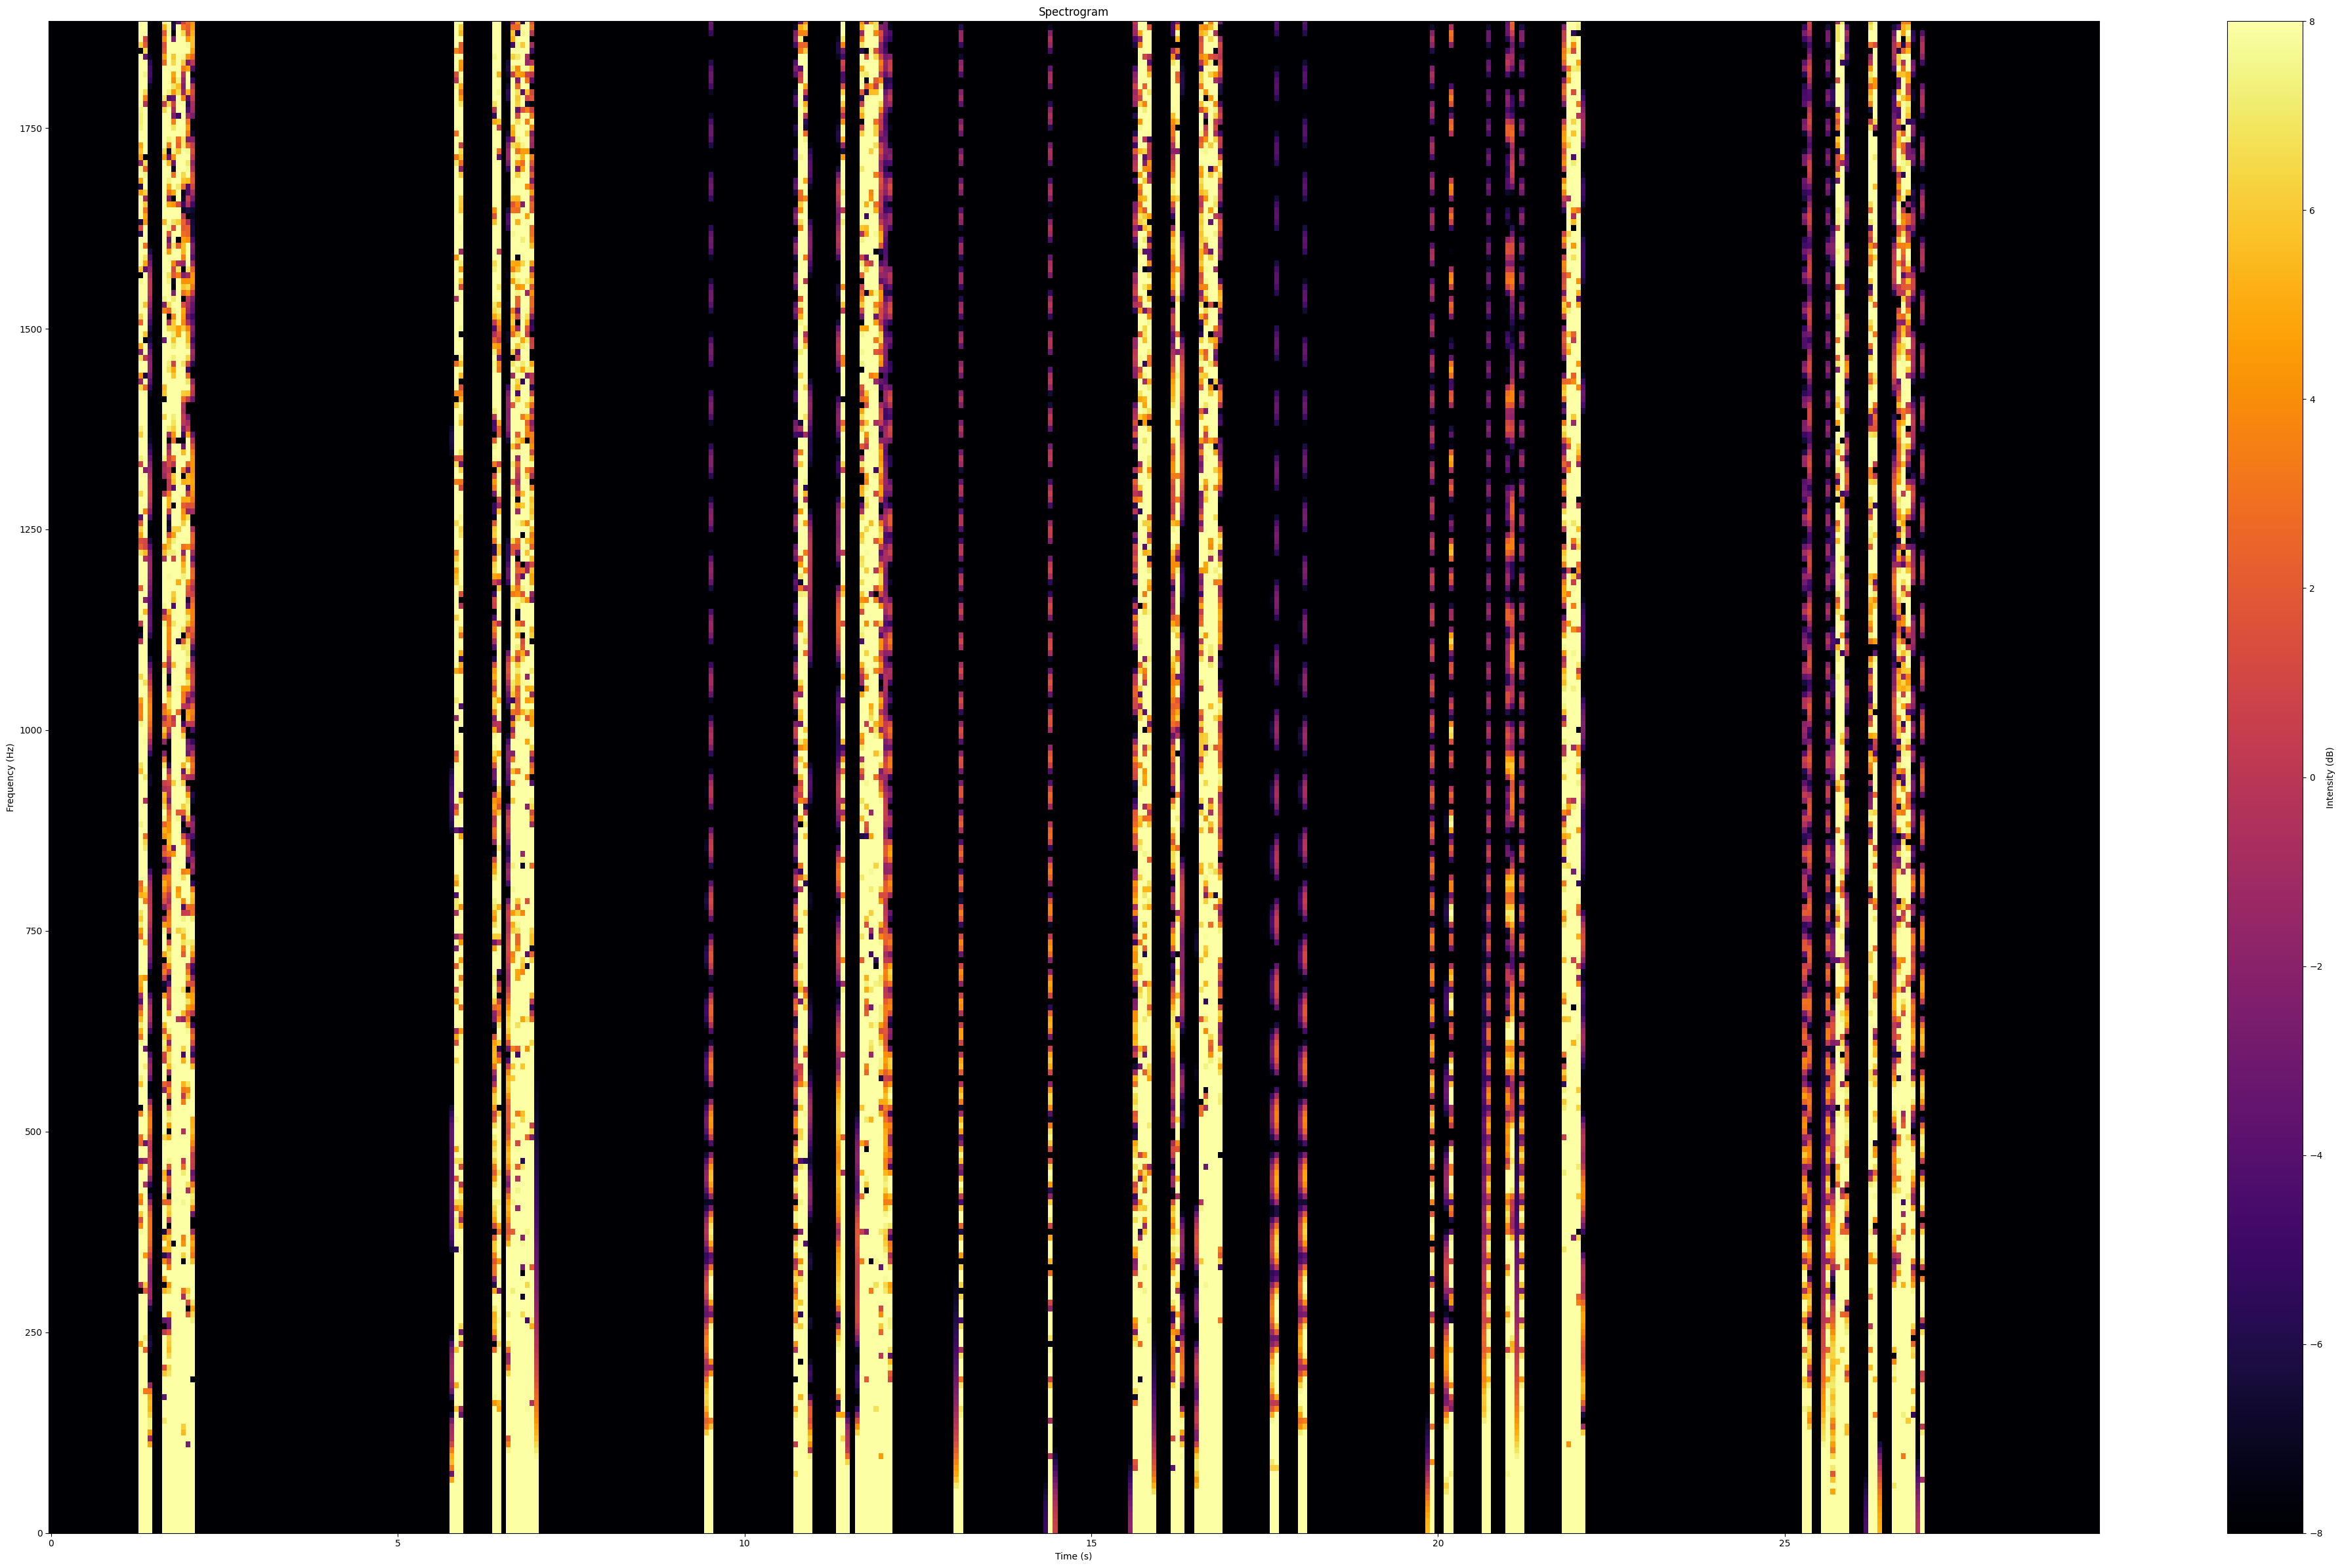

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.colors import Normalize

# Load your CSV file
data = pd.read_csv('Every5Sec30Sec.csv')

# Extract time elapsed iterations and voltage
iterations = data['Time Elapsed (s)'].values  # These are just iteration counts
voltage = data['Voltage'].values

# Sample rate is 3250 Hz
fs = 3766

# Calculate the actual time axis in seconds
actual_time = iterations / fs

# Convert voltage to tensor
waveform = tf.convert_to_tensor(voltage, dtype=tf.float32)

# Create spectrogram
def get_spectrogram(waveform):
    # Convert the waveform to a spectrogram via a STFT
    spectrogram = tf.signal.stft(
    waveform, frame_length=512, frame_step=256)

    # Obtain the magnitude of the STFT
    spectrogram = tf.abs(spectrogram)
    return spectrogram

spectrogram = get_spectrogram(waveform)


# Calculate time and frequency axes for plotting
num_frames = spectrogram.shape[0]
frame_step = 256
time_frames = np.arange(num_frames) * (frame_step / fs)
freq_bins = np.linspace(0, fs/2, spectrogram.shape[1])

# Plot the spectrogram
plt.figure(figsize=(40, 24))

#Convert to dB scale
spec_data = spectrogram.numpy()
# Add small epsilon to avoid log of zero
eps = np.finfo(float).eps
# Convert to dB: 20*log10(amplitude)
spec_db = 20 * np.log10(spec_data + eps)

# Focus on the -10 to 10 dB range
plt.pcolormesh(time_frames, freq_bins, spec_db.T,
               cmap='inferno',
               norm=Normalize(vmin=-8, vmax=8),  # Explicitly set the range to -10 to 10 dB
               shading='auto')

# Add a colorbar
cbar = plt.colorbar(label='Intensity (dB)')
cbar.set_ticks(np.arange(-8,9, 2))  # Set ticks every 2 dB from -10 to 10


plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
plt.ylim(0, fs/2)  # Show full frequency range up to Nyquist frequency
plt.tight_layout()
plt.show()


In [147]:
# Code to convert spectrogram to CSV
# First, convert spectrogram tensor to NumPy array
spec_data = spectrogram.numpy()

# Add small epsilon to avoid log of zero when converting to decibels
eps = np.finfo(float).eps
spec_db = 20 * np.log10(spec_data + eps)

# Prepare time and frequency axes
num_frames = spectrogram.shape[0]
frame_step = 256
fs = 3700  # Sample rate
time_frames = np.arange(num_frames) * (frame_step / fs)
freq_bins = np.linspace(0, fs/2, spectrogram.shape[1])

# Flatten the data into a format suitable for CSV
csv_data = []
for i, time in enumerate(time_frames):
    for j, freq in enumerate(freq_bins):
        csv_data.append([time, freq, spec_db[i, j]])

# Convert to pandas DataFrame and save to CSV
df = pd.DataFrame(csv_data, columns=['Time (s)', 'Frequency (Hz)', 'Intensity (dB)'])
df.to_csv('spectrogram_data.csv', index=False)
print("Spectrogram data saved to 'spectrogram_data.csv'")


Spectrogram data saved to 'spectrogram_data.csv'


In [134]:
# Create the 'Interval' column based on 5-second intervals
# Note: Using integer division to get interval numbers starting from 0
df['Interval'] = (df['Time (s)'] // 5).astype(int)
# If you want intervals starting from 1 instead of 0
df['Interval'] = df['Interval'] + 1
df = df.set_index('Interval')
df

,Time (s),Frequency (Hz),Intensity (dB)
Interval,,,
1,0.000000,0.000000,-313.071198
1,0.000000,7.226562,-313.071198
1,0.000000,14.453125,-313.071198
1,0.000000,21.679688,-313.071198
1,0.000000,28.906250,-313.071198
...,...,...,...
32,157.682162,1821.093750,18.864506
32,157.682162,1828.320312,18.864506
32,157.682162,1835.546875,18.864506
